In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Folder Paths
DATASET_ROOT = "dataset"   
train_dir = "dataset/train"
val_dir = "dataset/valid"
test_dir = "dataset/test"

In [15]:
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
SEED = 42

In [16]:
print("Train path:", train_dir)
print("Validation path:", val_dir)
print("Test path:", test_dir)

Train path: dataset/train
Validation path: dataset/valid
Test path: dataset/test


In [ ]:
# Data Augmentation 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.06,
    height_shift_range=0.06,
    zoom_range=0.08,
    brightness_range=(0.85, 1.15),
    shear_range=0.02,
    horizontal_flip=False,   
    fill_mode='reflect'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=SEED
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False,
    seed=SEED
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False,
    seed=SEED
)

Found 2637 images belonging to 9 classes.
Found 760 images belonging to 9 classes.
Found 290 images belonging to 9 classes.


In [19]:
with open("class_indices.json", "w") as f:
    json.dump(train_generator.class_indices, f, indent=2)

print("Saved class_indices.json")
print("\nClass Mapping:", train_generator.class_indices)

Saved class_indices.json

Class Mapping: {'1': 0, '10': 1, '10 (new)': 2, '100': 3, '20': 4, '20 (new)': 5, '200': 6, '5': 7, '50': 8}


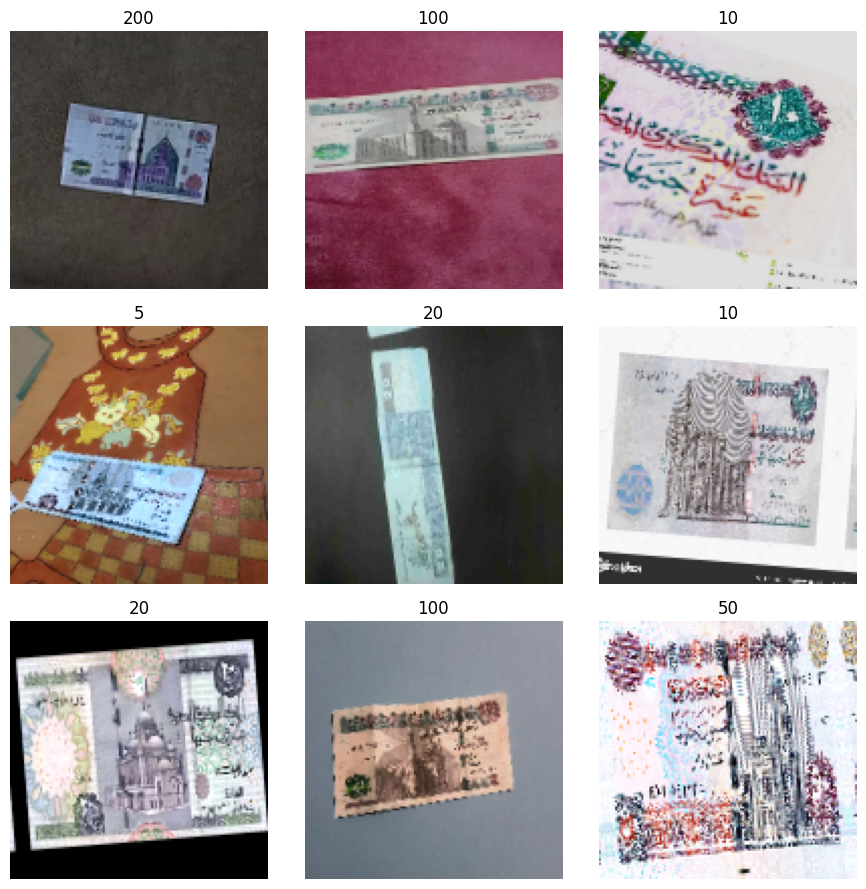

In [ ]:
# Preview Sample Images
x_batch, y_batch = next(train_generator)

def show_images(images, labels, class_map, n=9):
    plt.figure(figsize=(9, 9))
    for i in range(n):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        cls_index = np.argmax(labels[i])
        cls_name = [k for k, v in class_map.items() if v == cls_index][0]
        plt.title(cls_name)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_images(x_batch, y_batch, train_generator.class_indices)

